<a href="https://colab.research.google.com/github/Chaithanya3K/Deep_learning/blob/main/Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/homeprices.csv")
df.head(5)

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


##MinMax Scaling bring the data in range of 0 to 1

In [3]:
from  sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
print(scaled_x)

[[0.         0.         0.54545455]
 [0.26666667 0.33333333 0.31818182]
 [0.4        0.         0.45454545]
 [0.66666667 0.         1.        ]
 [0.93333333 0.66666667 0.        ]
 [1.         1.         0.        ]]


In [4]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

##Batch Gradient Descent
### In this approach, the model goes through the entire training dataset in each epoch. It computes the error for each data point, and then calculates the mean of these errors,at the end of epoch (i.e., the cost). The gradient (derivative) of this cost with respect to the model parameters is then computed. Finally, the weights are updated based on this gradient.

In [5]:
np.ones(shape=(2))

array([1., 1.])

In [6]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
  number_of_features=x.shape[1]
  w=np.ones(shape=(number_of_features))
  bias=0
  total_sample=x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    #w1*area+w2*bedroom+bias
    #Transpose convert the row to col and col to row
    # 2000,3,60
    #2000
    #3
    #60
    y_predited=np.dot(w,scaled_x.T)+bias
    # (d(error)/dw1)
    w_der=-(2/total_sample)*(x.T.dot(y_true-y_predited))
    b_der=-(2/total_sample)*np.sum(y_true-y_predited)
    w=w-learning_rate*w_der
    bias=bias-learning_rate*b_der
    cost=np.mean(np.square(y_true-y_predited))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w,bias,cost,cost_list,epoch_list

In [7]:
w,bias,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [8]:
w,bias,cost

(array([0.58463554, 0.889126  , 0.47655921]),
 np.float64(-0.4336741733568186),
 np.float64(0.028058695087929738))

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


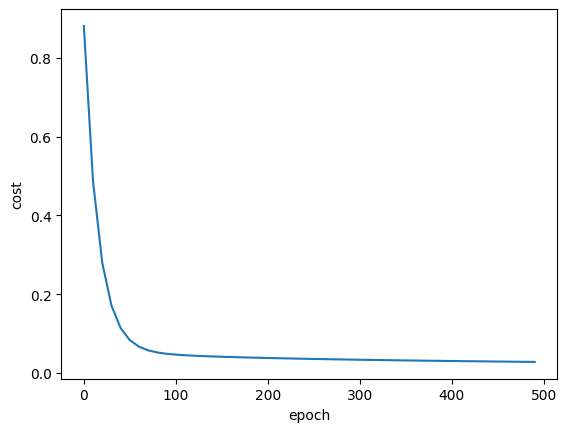

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [11]:
def prediction(area,bedroom,age,w,bias):
  scaled_x=sx.transform([[area,bedroom,age]])
  scaled_price=w[0]*scaled_x[0][0]+w[1]*scaled_x[0][1]+w[2]*scaled_x[0][2]+bias
  return sy.inverse_transform([[scaled_price]])

In [12]:
prediction(3000,4,15,w,bias)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[594261.47658582]])

In [13]:
import random

In [40]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
  number_of_features=x.shape[1]
  w=np.ones(shape=(number_of_features))
  bias=0
  total_sample=x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    #w1*area+w2*bedroom+bias
    #Transpose convert the row to col and col to row
    # 2000,3,60
    #2000
    #3
    #60
    random_index=random.randint(0,x.shape[0]-1)
    sample_x=x[random_index]
    sample_y=y_true[random_index]
    y_predited=np.dot(w,sample_x.T)+bias
    # (d(error)/dw1)
    w_der=-(2/total_sample)*(sample_x.T.dot(sample_y-y_predited))
    b_der=-(2/total_sample)*np.sum(sample_y-y_predited)
    w=w-learning_rate*w_der
    bias=bias-learning_rate*b_der
    cost=np.square(sample_y-y_predited)
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w,bias,cost,cost_list,epoch_list

In [41]:
w1,bias1,cost,cost_list,epoch_list=stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [42]:
def prediction(area,bedroom,age,w,bias):
  scaled_x=sx.transform([[area,bedroom,age]])
  scaled_price=w[0]*scaled_x[0][0]+w[1]*scaled_x[0][1]+w[2]*scaled_x[0][2]+bias
  return sy.inverse_transform([[scaled_price]])

In [43]:
prediction(3000,4,15,w1,bias1)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[596454.75811673]])

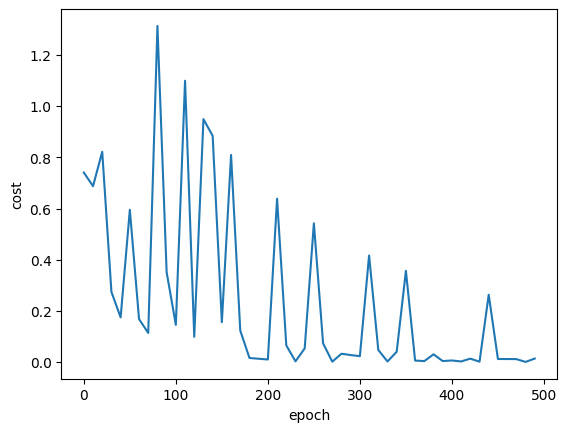

In [44]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)